In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Đọc file nếu nó chỉ chứa 2 cột tọa độ, cách nhau bởi khoảng trắng
data = pd.read_csv('att48_xy.txt', sep='\s+', header=None).values
print(data[:5])
print(data.shape)

[[6734 1453]
 [2233   10]
 [5530 1424]
 [ 401  841]
 [3082 1644]]
(48, 2)


                                            Initialization      

In [3]:
import math
num_nodes = 48
population_size = 100
def calculate_dist(node1, node2):
    # node1 và node2 là mảng [x, y]
    return math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

In [4]:
def total_tour_distance(coords, tour_indices):
    total_dist = 0
    for i in range(len(tour_indices) - 1):
        node_a = coords[tour_indices[i]]
        node_b = coords[tour_indices[i+1]]
        total_dist += calculate_dist(node_a, node_b)
    return total_dist

In [5]:
def get_random_tour(coords):
    num_nodes = len(coords)
    indices = list(range(num_nodes))
    random.shuffle(indices)
    tour_indices = indices + [indices[0]]
    return tour_indices

random_tour = get_random_tour(data)
print(f"(thứ tự các node):")
print(random_tour)
print(f"Tổng khoảng cách hành trình: {total_tour_distance(data, random_tour)}")

(thứ tự các node):
[29, 18, 5, 16, 42, 10, 38, 4, 27, 12, 40, 1, 24, 37, 45, 28, 30, 34, 46, 32, 20, 6, 9, 33, 15, 19, 44, 17, 47, 13, 22, 8, 7, 14, 36, 23, 39, 2, 35, 21, 43, 41, 0, 25, 11, 26, 3, 31, 29]
Tổng khoảng cách hành trình: 160093.39227076503


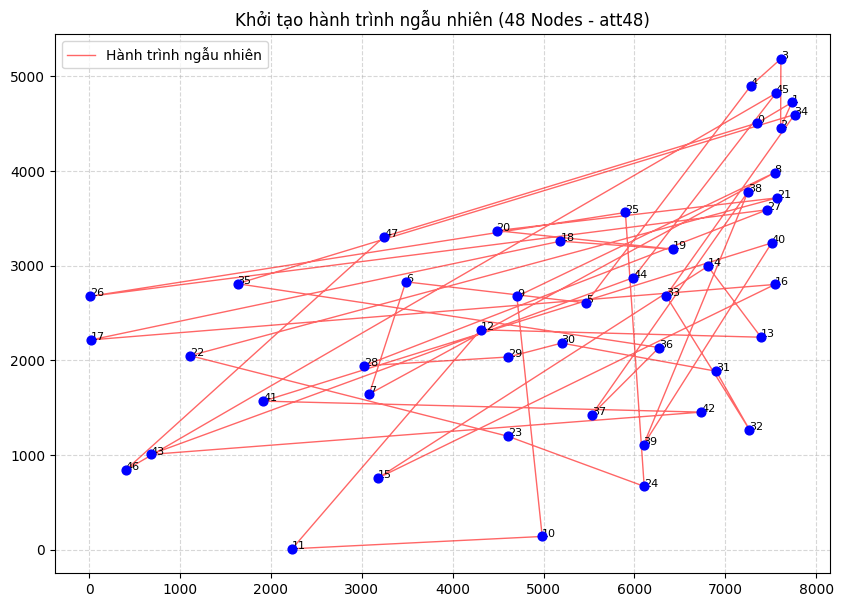

In [6]:
def plot_tour(coords, tour_indices):
    plt.figure(figsize=(10, 7))
    
    # Lấy tọa độ X và Y theo thứ tự của hành trình ngẫu nhiên
    ordered_coords = coords[tour_indices]
    
    # Vẽ các đường nối giữa các thành phố
    plt.plot(ordered_coords[:, 0], ordered_coords[:, 1], 'r-', alpha=0.6, linewidth=1, label='Hành trình ngẫu nhiên')
    
    # Vẽ các điểm thành phố
    plt.scatter(coords[:, 0], coords[:, 1], color='blue', s=40, zorder=5)
    
    # Đánh số thứ tự bốc thăm lên biểu đồ (tùy chọn)
    for i, idx in enumerate(tour_indices[:-1]):
        plt.annotate(f"{i}", (coords[idx, 0], coords[idx, 1]), fontsize=8)

    plt.title("Khởi tạo hành trình ngẫu nhiên (48 Nodes - att48)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

plot_tour(data, random_tour)

In [7]:
def create_population(size, nodes_count, coords_data):
    population = []
    for _ in range(size):
        tour = np.arange(nodes_count) # Tạo danh sách các chỉ số từ 0 đến nodes_count-1
        np.random.shuffle(tour) # Xáo trộn danh sách các chỉ số từ 0 đến nodes_count-1, tránh việc thuật toán bị hội tụ cục bộ quá sớm
        full_path = np.append(tour, tour[0]) # Thêm điểm đầu tiên vào cuối để hoàn thành hành trình( vòng tròn)
        dist = total_tour_distance(coords_data, full_path) 
        population.append({
            "path": full_path,
            "distance": dist
        })# Thêm cá thể vào quần thể
    return population

my_population = create_population(population_size, num_nodes, data)

# In kết quả quãng đường của 100 phương án
print(f"--- Quãng đường của {population_size} phương án khởi tạo ---")
for i, ind in enumerate(my_population):
    print(f"Phương án {i+1}: {ind['distance']:.2f}")

--- Quãng đường của 100 phương án khởi tạo ---
Phương án 1: 153328.07
Phương án 2: 166700.10
Phương án 3: 147717.36
Phương án 4: 154002.09
Phương án 5: 165490.36
Phương án 6: 158985.07
Phương án 7: 146156.79
Phương án 8: 146051.64
Phương án 9: 160321.80
Phương án 10: 158905.78
Phương án 11: 161090.49
Phương án 12: 165907.28
Phương án 13: 139595.24
Phương án 14: 154232.93
Phương án 15: 164726.10
Phương án 16: 163944.87
Phương án 17: 160076.02
Phương án 18: 164443.25
Phương án 19: 164650.30
Phương án 20: 170310.25
Phương án 21: 164855.69
Phương án 22: 164985.50
Phương án 23: 159858.45
Phương án 24: 170978.96
Phương án 25: 147113.16
Phương án 26: 144414.73
Phương án 27: 164532.14
Phương án 28: 176745.63
Phương án 29: 144132.68
Phương án 30: 164893.48
Phương án 31: 159885.43
Phương án 32: 133606.60
Phương án 33: 169954.18
Phương án 34: 180332.53
Phương án 35: 153354.73
Phương án 36: 152069.97
Phương án 37: 152787.00
Phương án 38: 149956.49
Phương án 39: 171352.34
Phương án 40: 156965.29
Ph

                                Evaluation      

In [8]:
def sort_population_and_select_best_half(my_population):
    sorted_population = sorted(my_population, key=lambda x: x['distance']) # tăng dần theo quãng đường(distance)
# 2. cắt 50%
    cut = len(sorted_population) // 2
# 3. Lấy 50% tốt nhất (0->nửa danh sách đã sắp xếp)
    best_50_percent = sorted_population[:cut]
    return sorted_population, best_50_percent
sorted_population, best_50_percent = sort_population_and_select_best_half(my_population)
print(f"Số lượng cá thể giữ lại: {len(best_50_percent)}")
print(f"Phương án tốt nhất có quãng đường: {sorted_population[0]['distance']:.2f}")
print("\nDanh sách quãng đường 50% tốt nhất:")
for ind in best_50_percent:
    print(f"{ind['path']}- {ind['distance']:.2f}")


Số lượng cá thể giữ lại: 50
Phương án tốt nhất có quãng đường: 130389.16

Danh sách quãng đường 50% tốt nhất:
[ 3 34 14 18  5 30 40 17 39 42  8 47  1 23 28  9 44 12 13 37  4 10 25 33
 24  7 45 20 11 15 43 41 31 32 19  0 38  2  6 36 16 29 21 46 35 22 27 26
  3]- 130389.16
[14 34 23  6 21 13 44  3  1 33 28 24 45 38 46 20  8 47  2 31 16 18 30  5
 27 17 43  4 32 12 22 41 35 29 25 19 42 26  0 36 40  7 37 11  9 15 10 39
 14]- 131111.54
[29  5 25 30 17  7 38 21  1  6 10 32 18 45 27 36  2 24 15 16 20 39 13 33
 37 12 41  9 44  4 28 47 26 42 43  8 11 22 31  0 14 19 34 40 35 46  3 23
 29]- 133606.60
[46 26 35  6 28 25 40 44  4 23 47  9  7 38 18 33 13 15  3 20 14 32 27 30
 10 36 39 42  5 41  0 34  1 31  2 16 19 29 11 21  8 24 37 22 45 17 43 12
 46]- 135699.46
[ 0 11 16  3 15 46 43 32 27 17 29 18 12 28  4 26 10  8 19 20 47 14  2 44
  9 34 40 21 41 13 38 31  1  6  5 33 39 42 35 25 36 23  7 37 45 22 24 30
  0]- 136926.41
[43 21 14 30 11 32  5 45 27 18 19  4 37 25  7 39 22  8 47 40 20  2 26 46
 44 42 

                                Crossover & Mutation &Selection 
                                

In [9]:
def cycle_crossover(parent1_path, parent2_path):
    # Lấy n phần tử đầu (bỏ điểm quay về cuối cùng)
    p1 = parent1_path[:-1]
    p2 = parent2_path[:-1]
    n = len(p1)
    
    # Khởi tạo 2 con với giá trị rỗng (-1)
    child1 = np.full(n, -1, dtype=int)
    child2 = np.full(n, -1, dtype=int)
    # đánh dấu các phần tử đã thăm
    visited = np.zeros(n, dtype=bool)
    cycle_id = 0
    """
    Cha 1 (P1): [1, 2, 3, 4, 5, 6, 7, 8, 9] 
    Cha 2 (P2): [9, 3, 7, 8, 2, 6, 5, 1, 4]
    [0, 8, 3, 7] tạo thành chu trình 1( cycle_id = 0)(1-9-8-4-1)
    child1 lấy từ P1, child2 lấy từ P2
    c1=[1, -1, -1, 4, -1, -1, -1, 8, 9]
    c2=[9, -1, -1, 8, -1, -1, -1, 1, 4]
    [1, 2, 6, 4] tạo thành chu trình 2( cycle_id = 1)(2-3-7-5-2)
    c1 lấy từ P2, c2 lấy từ P1
    c1=[1, 3, 7, 4, 2, -1, 5, 8, 9]
    c2=[9, 2, 3, 8, 5, -1, 7, 1, 4]
    """
    for i in range(n):
        if not visited[i]:
            # Tìm một chu trình mới
            cycle_indices = []
            curr = i
            while curr not in cycle_indices:
                cycle_indices.append(curr)
                visited[curr] = True
                # Tìm vị trí của giá trị p2[curr] trong p1 để tiếp tục chu trình
                target_val = p2[curr]
                curr = np.where(p1 == target_val)[0][0]
            
            # Sao chép xen kẽ các chu trình vào con( child1 và child2 lấy từ p1 và p2, cycle_id chẵn thì lấy từ p1, lẻ thì lấy từ p2 và ngược lại)
            if cycle_id % 2 == 0:
                child1[cycle_indices] = p1[cycle_indices]
                child2[cycle_indices] = p2[cycle_indices]
            else:
                child1[cycle_indices] = p2[cycle_indices]
                child2[cycle_indices] = p1[cycle_indices]
            cycle_id += 1
            
    # Khép kín vòng lặp cho các con
    full_c1 = np.append(child1, child1[0])
    full_c2 = np.append(child2, child2[0])
    return full_c1, full_c2

In [10]:
def swap_mutation(path_indices, p_m=0.1):
    """Đột biến đổi chỗ 2 điểm """
    path = path_indices[:-1].copy() # Lấy n node (bỏ điểm quay về)
    
    if random.random() < p_m:
        # Chọn 2 vị trí bất kỳ và đổi chỗ
       
        idx1, idx2 = random.sample(range(len(path)), 2)
        path[idx1], path[idx2] = path[idx2], path[idx1]
        
    return np.append(path, path[0]) # Khép kín vòng lặp

In [11]:
def selection_elitism(combined_population, n_size):
    """Chọn lọc Elitism: Giữ lại n cá thể tốt nhất """
    # Sắp xếp theo quãng đường tăng dần
    sorted_pop = sorted(combined_population, key=lambda x: x['distance'])
    # Trả về n_size cá thể đứng đầu(slicing)
    return sorted_pop[:n_size]

In [ ]:
def breed_population(parent_pop, coords_data, p_c=0.7):
    offspring_pop = []
    # Xáo trộn danh sách cha mẹ để chọn cặp ngẫu nhiên
    random.shuffle(parent_pop)
    
    # Chia cặp (ví dụ: cá thể 0 lai với 1, 2 lai với 3...)
    for i in range(0, len(parent_pop) - 1, 2):
        parent1 = parent_pop[i]
        parent2 = parent_pop[i+1]
        
        if random.random() < p_c:
            # Thực hiện lai ghép [cite: 655]
            c1_path, c2_path = cycle_crossover(parent1['path'], parent2['path'])
            # Tính quãng đường và thêm vào danh sách con
            offspring_pop.append({"path": c1_path, "distance": total_tour_distance(coords_data, c1_path)})
            offspring_pop.append({"path": c2_path, "distance": total_tour_distance(coords_data, c2_path)})
        else:
            # Nếu không lai, giữ nguyên cha mẹ làm con (hoặc tạo bản sao)
            offspring_pop.append(parent1.copy())
            offspring_pop.append(parent2.copy())
            
    return offspring_pop
#(chưa nghiên cứu)

In [19]:
N = 300          # Kích thước quần thể
generations = 500  # Số thế hệ
p_c = 0.7      # Xác suất lai ghép
p_m = 0.1   # Xác suất đột biến

#  Khởi tạo quần thể ban đầu (P0) 
current_pop = sort_population_and_select_best_half(create_population(N*2, num_nodes, data),)[1] # best_50_percent lấy quần thể tốt nhất 
history_best = []
history_best_path=[]
print("Bắt đầu tiến hóa...")

for gen in range(generations):
    # Lai ghép tạo quần thể con (Ct) 
    offspring = breed_population(current_pop, data, p_c)
     
    #  Đột biến các cá thể con 
    for ind in offspring:
        ind['path'] = swap_mutation(ind['path'], p_m)
        ind['distance'] = total_tour_distance(data, ind['path'])
        
    # Chọn lọc sinh tồn (Pt+1) 
    # Gộp cha mẹ và con lại rồi chọn N cái tốt nhất
    combined = current_pop + offspring
    current_pop = selection_elitism(combined, N)
    
    # Lưu lại kết quả tốt nhất thế hệ này để theo dõi
    best_dist = current_pop[0]['distance']# Quãng đường tốt nhất hiện tại(float)
    history_best.append(best_dist)
    best_path = current_pop[0]['path'] # Lộ trình tốt nhất hiện tại(array)
    history_best_path.append(best_path)
    if (gen + 1) % 10 == 0:
        print(f"Thế hệ {gen+1}: Quãng đường ngắn nhất = {best_dist:.2f}")

print(f"Quãng đường đã giảm từ {history_best[0]:.2f} xuống còn {history_best[-1]:.2f}")

Bắt đầu tiến hóa...
Thế hệ 10: Quãng đường ngắn nhất = 108806.75
Thế hệ 20: Quãng đường ngắn nhất = 97520.06
Thế hệ 30: Quãng đường ngắn nhất = 76417.82
Thế hệ 40: Quãng đường ngắn nhất = 73249.69
Thế hệ 50: Quãng đường ngắn nhất = 68810.22
Thế hệ 60: Quãng đường ngắn nhất = 66480.43
Thế hệ 70: Quãng đường ngắn nhất = 64395.66
Thế hệ 80: Quãng đường ngắn nhất = 62941.93
Thế hệ 90: Quãng đường ngắn nhất = 59752.70
Thế hệ 100: Quãng đường ngắn nhất = 57435.84
Thế hệ 110: Quãng đường ngắn nhất = 56236.87
Thế hệ 120: Quãng đường ngắn nhất = 55760.53
Thế hệ 130: Quãng đường ngắn nhất = 55265.07
Thế hệ 140: Quãng đường ngắn nhất = 54866.61
Thế hệ 150: Quãng đường ngắn nhất = 53947.41
Thế hệ 160: Quãng đường ngắn nhất = 53184.48
Thế hệ 170: Quãng đường ngắn nhất = 53068.42
Thế hệ 180: Quãng đường ngắn nhất = 53068.42
Thế hệ 190: Quãng đường ngắn nhất = 52759.47
Thế hệ 200: Quãng đường ngắn nhất = 52243.91
Thế hệ 210: Quãng đường ngắn nhất = 51978.08
Thế hệ 220: Quãng đường ngắn nhất = 51835.0

In [20]:
print({history_best[-1]})
print(history_best_path[-1])

{39738.119742001705}
[27  6 35 17 30 43 45 32 19 11 14 39 10 46 20 38 31 47  4 23  9 25  3 34
 44 41  1 28 40 15 21  0  8 37  7  2 33 22 13 24 12 42 16 26 18 36  5 29
 27]


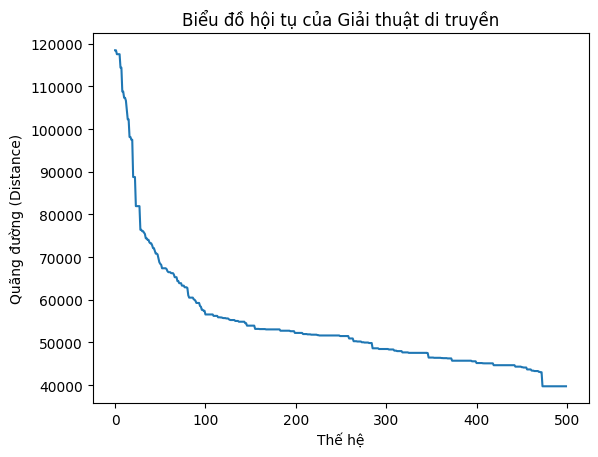

In [21]:
import matplotlib.pyplot as plt

plt.plot(history_best)
plt.title("Biểu đồ hội tụ của Giải thuật di truyền")
plt.xlabel("Thế hệ")
plt.ylabel("Quãng đường (Distance)")
plt.show()